In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/height-weight.xls")

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [ ]:
df.isnull().sum()

,0
Weight,0
Height,0


Text(0, 0.5, 'height')

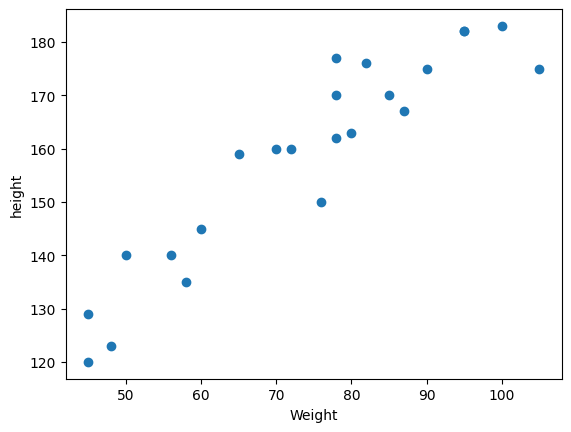

In [ ]:
#Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("height")

In [ ]:
#Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


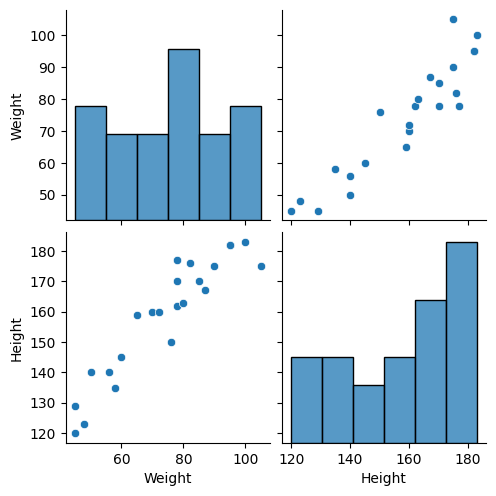

In [ ]:
#seaborn for visualisation
sns.pairplot(df)

In [ ]:
#Independent and dependent features
X = df[['Weight']]    # Independent feature should be dataframe or 2-D array.
y=df['Height']    # This variable can be in series form or 1 D array

In [ ]:
X_series= df['Weight']    # Independent feature should be dataframe or 2-D array.
np.array(X_series).shape

(23,)

In [ ]:
np.array(y).shape

(23,)

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [ ]:
#Apply simple linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
regression=LinearRegression(n_jobs=-1)

In [ ]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("Coefficient or slope: ",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or slope:  [17.2982057]
Intercept:  156.47058823529412


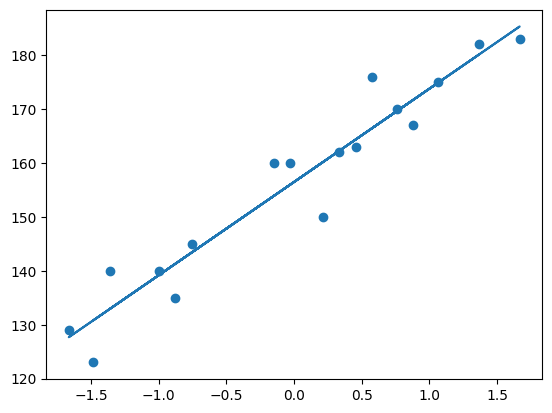

In [ ]:
# Plot the training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

#Prediction of test data.  
1. Predicted height output = intercept + coef_(weights).  
2. y_pred_test= 156.470 + 17.29(X_test).

In [ ]:
#Prediction for test data
y_pred=regression.predict(X_test)

In [ ]:
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


#R square.  
Formula  
**R^2=1-SSR/SST**
R^2 = coefficient of determination.  
SSR = sum of squares of residuals.  
SST = total sum of squares.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


#**Adjusted R^2 = 1 - [(1-R^2)*(n-1)/(n-k-1)]**  
where  
R^2 : The R^2 of the model.  
n : The number of observations.  
k : The number of predictor variables.

In [ ]:
#Display adjusted R-squared.
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [ ]:
# OLS Linear Regression
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train,X_train).fit()

In [ ]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 19 Dec 2025   Prob (F-statistic):                       0.664
Time:                        09:16:25   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#prediction for new data
regression.predict(scaler.fit_transform([[72]]))

array([156.47058824])